In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
from sklearn.datasets import make_classification

In [45]:
x,y=make_classification(n_classes=2,n_features=3,n_samples=1000,n_informative=2,n_redundant=1)

In [46]:
df=pd.DataFrame(x,columns=['feature1','feature2','feature3'])

In [47]:
df['class']=y

In [48]:
df.head()

,feature1,feature2,feature3,class
0,1.706094,2.578970,-0.229546,1
1,0.216600,0.948947,0.068294,1
2,1.894300,0.732359,-0.588959,1
3,2.267712,1.106886,-0.668975,1
4,1.435447,0.790059,-0.409441,1


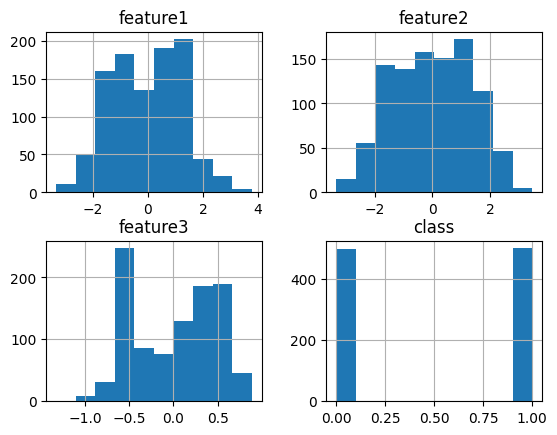

In [49]:
df.hist()
plt.show()

<Axes: >

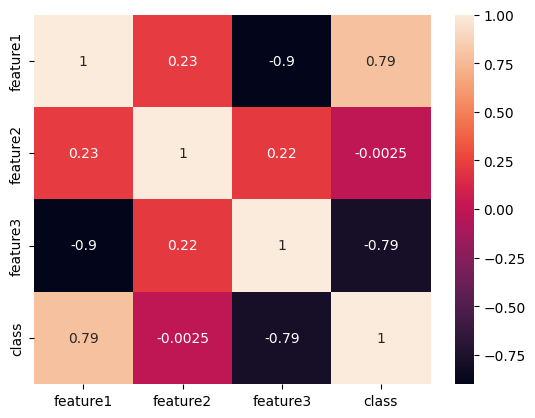

In [50]:
sns.heatmap(df.corr(),annot=True)

In [51]:
from sklearn.linear_model import LogisticRegression


In [52]:
model=LogisticRegression()

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [54]:
model.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0])

In [56]:

accuracy=model.score(x_test,y_test)
accuracy

0.9

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

<Axes: >

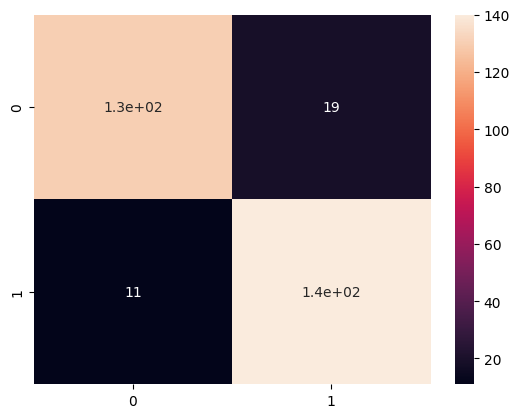

In [58]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.87      0.90       149
           1       0.88      0.93      0.90       151

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# hyper parameter tuning

In [60]:
penalty= ['l1','l2','elasticnet']
c_vals=[100,10,1,0.1,0,0.01]
solvers=['lbfgs','liblinear','sag','saga']

In [61]:
 params=dict( penalty=penalty,C=c_vals,solver=solvers )

In [62]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0, 0.01],
 'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}

# gridSearchCV

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [64]:
LR=LogisticRegression()
cv=StratifiedKFold()

grid=GridSearchCV(estimator=LR,param_grid=params,scoring='accuracy',cv=cv,n_jobs=-1)

In [65]:
grid.fit(x_train,y_train)

C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
210 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [66]:
grid.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [67]:
grid.best_score_

0.9114285714285714

In [68]:
y_pred=grid.predict(x_test)

<Axes: >

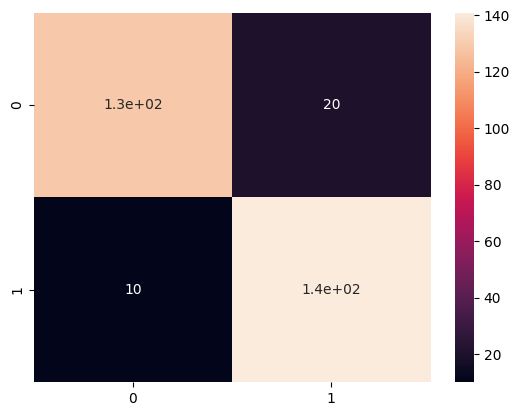

In [69]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       149
           1       0.88      0.93      0.90       151

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# Randomized search cv

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
LR2=LogisticRegression()
randomcv=RandomizedSearchCV(estimator=LR2,param_distributions=params,cv=5,scoring='accuracy')

In [73]:
randomcv.fit(x_train,y_train)

C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PS001028870\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [100, 10, 1, 0.1, 0, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear', 'sag',
                                                   'saga']},
                   scoring='accuracy')

In [74]:
randomcv.best_score_

0.9114285714285714

In [75]:
randomcv.best_params_

{'solver': 'saga', 'penalty': 'l1', 'C': 0.1}

In [76]:
y_pred=grid.predict(x_test)

<Axes: >

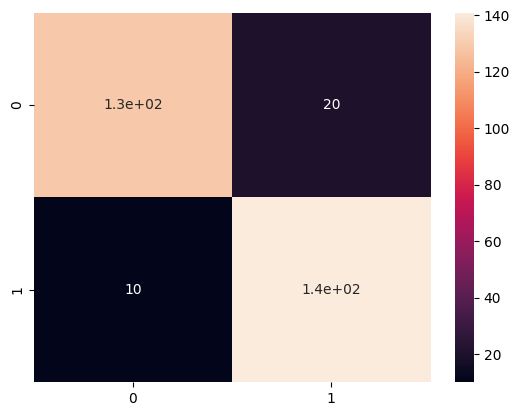

In [77]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       149
           1       0.88      0.93      0.90       151

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

